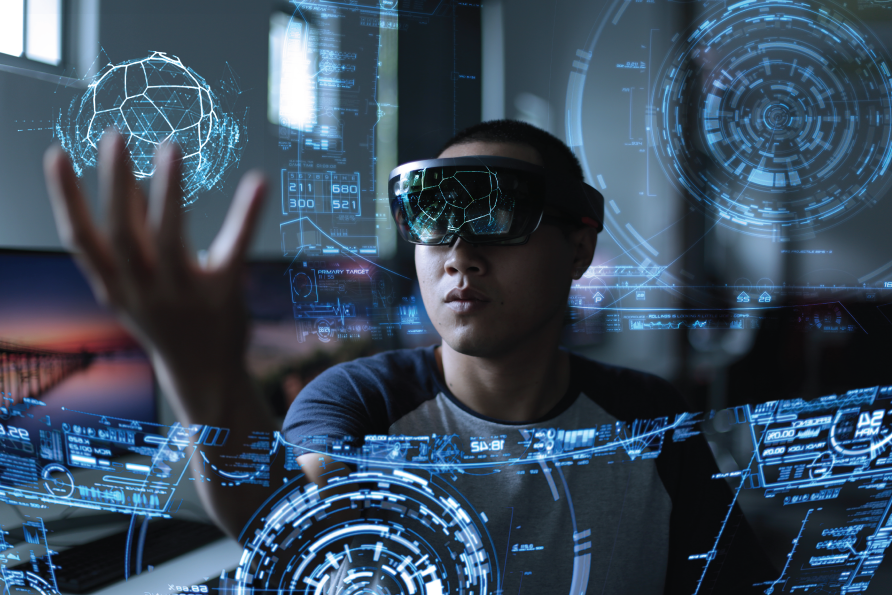

# Libraries

In [1]:
import pandas as pd
import typing
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 
import time
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')

In [2]:
def load_csv(path: str) -> pd.DataFrame:
    return pd.read_csv(path).iloc[:,1:]

In [3]:
def show_most_occuring_books(df: pd):
    sns.set_context('poster')
    plt.figure(figsize=(25,15))
    books = df['title'].value_counts()[:20]
    rating = df['rating'][:20]
    sns.barplot(x = books, y = books.index, palette='deep')
    plt.title("Most Occurring Books")
    plt.xlabel("Number of occurances")
    plt.ylabel("Books")
    plt.show()
    

In [4]:
def show_most_rated_books(df: pd):
    most_rated = df.sort_values('rating-count', ascending = False).head(10).set_index('title')
    plt.figure(figsize=(15,10))
    sns.barplot(most_rated['rating-count'], most_rated.index, palette='rocket')

In [5]:
'''
From the given plot, we can infer that:

Majority of the ratings lie near 3.7-4.3, approximately. Books having scores near 5 are extremely rare
'''
def show_rating_distribution(df: pd):
    plt.figure(figsize=(10,10))
    rating= df['rating'].astype(float)
    sns.distplot(rating, bins=20)

In [6]:
def show_season_distribution(df: pd):
    replace_map = {
        1:'Summer',
        2:'Winter',
        3:'Autumn',
        4:'Spring'
    }
    df['season-published'].replace(replace_map,inplace=True)
    df["season-published"].value_counts().plot(figsize =(10,10),kind='pie', autopct='%1.1f%%')

In [7]:
def show_top5_categories(df: pd):
    plt.figure(figsize=(30,9))
    categories_df = df[list(df.columns)[12:52]]
    categories_dict = dict(categories_df.sum())
    sorted_dict = dict()
    sorted_keys = sorted(categories_dict, key=categories_dict.get, reverse=True)
    for key in sorted_keys:
        sorted_dict[key] = categories_dict[key]
    keys = list(sorted_dict.keys())[:5]
    values = list(sorted_dict.values())[:5]
    sns.barplot(x = keys, y = values, palette='deep')
    plt.show()

In [8]:
df = load_csv('converted_data.csv')

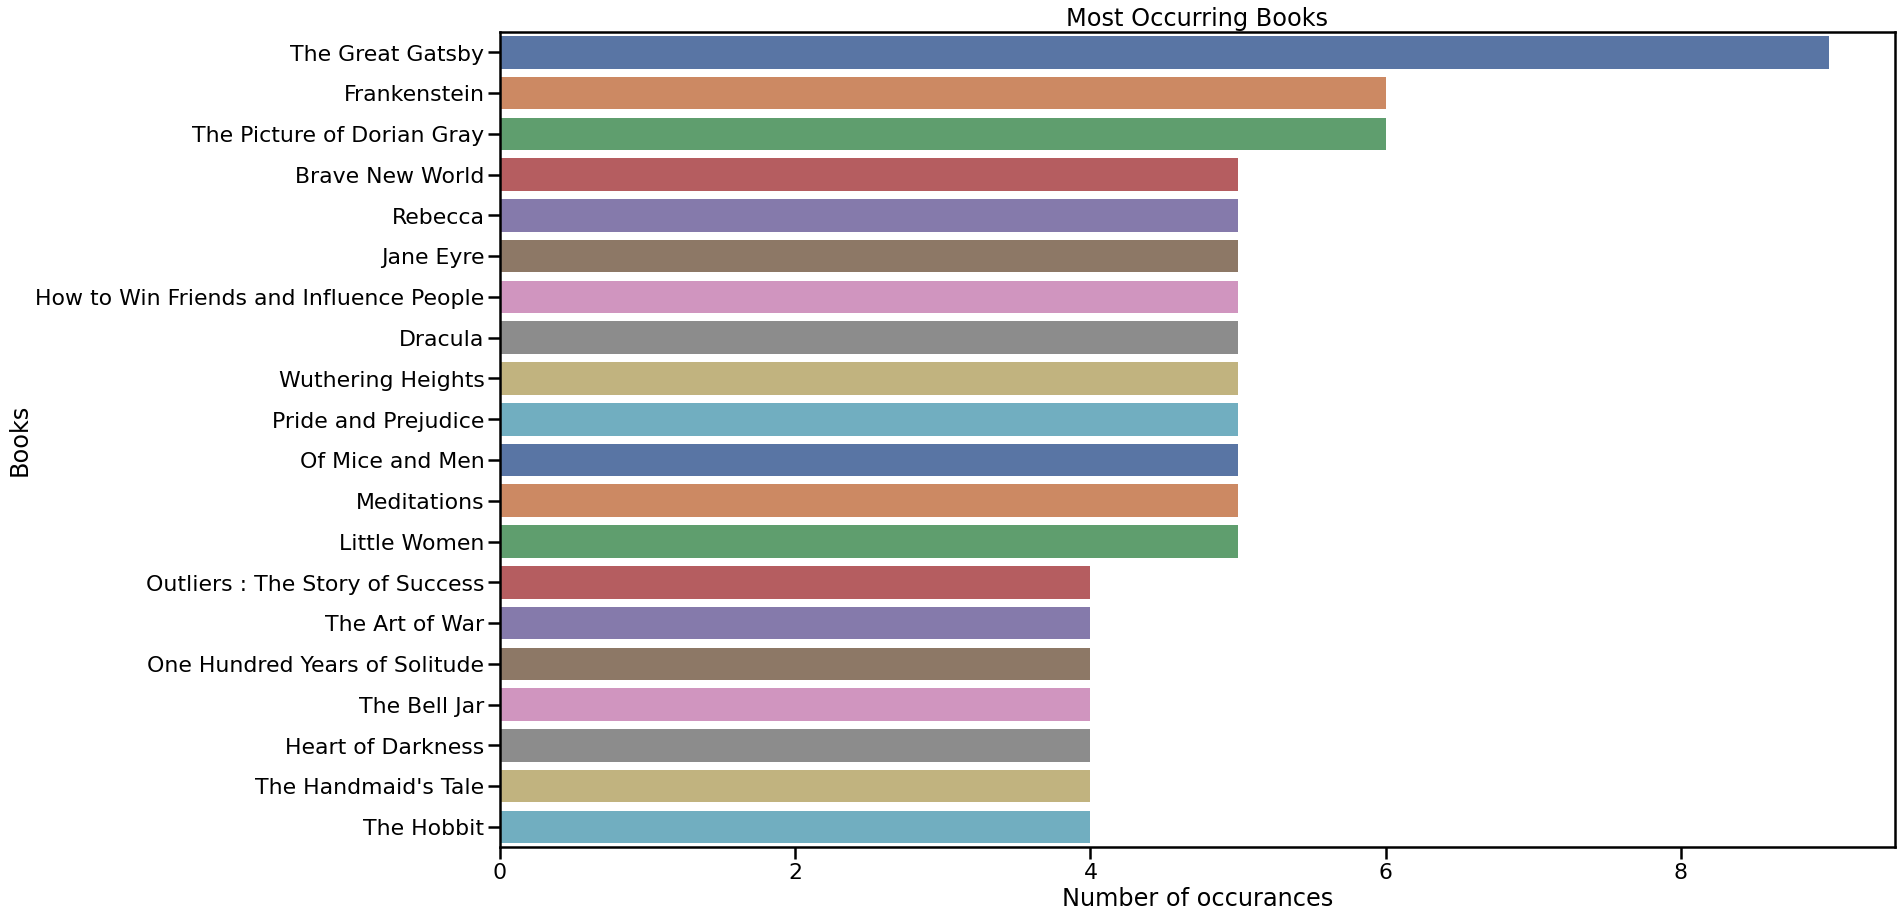

In [9]:
show_most_occuring_books(df)

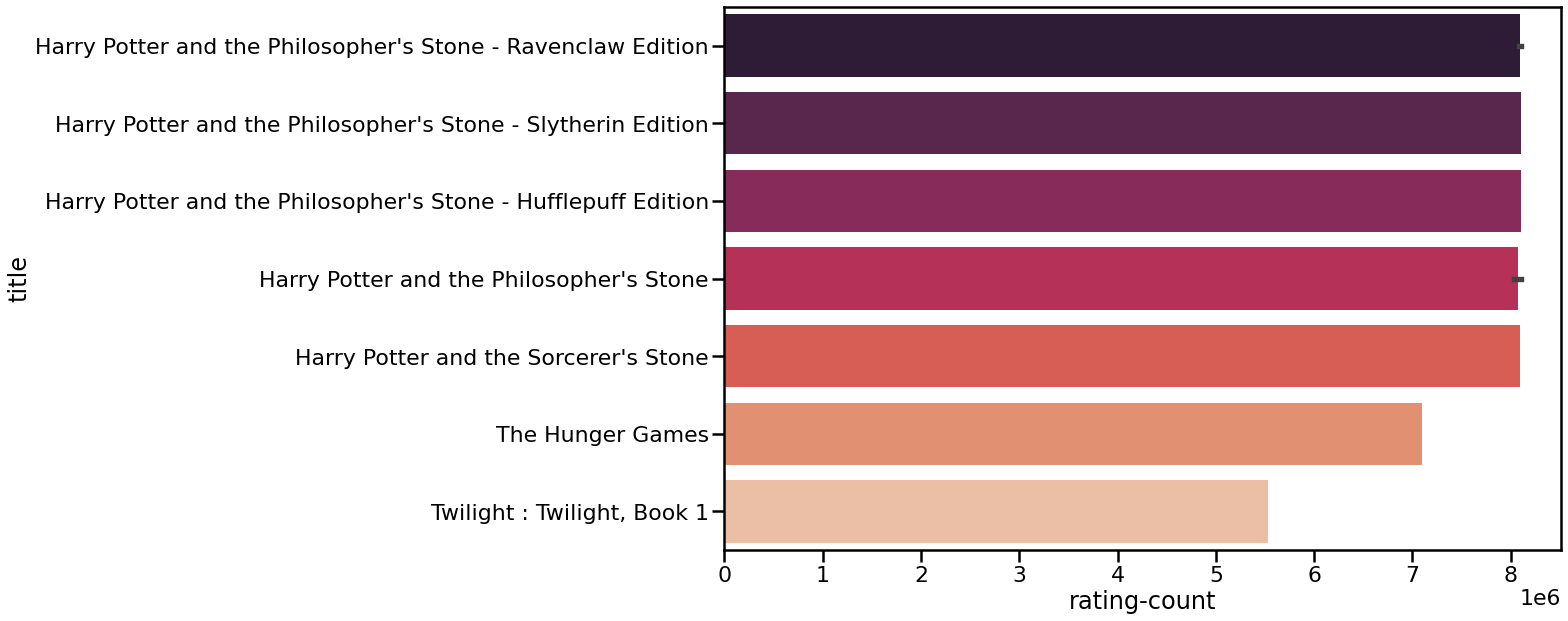

In [10]:
show_most_rated_books(df)

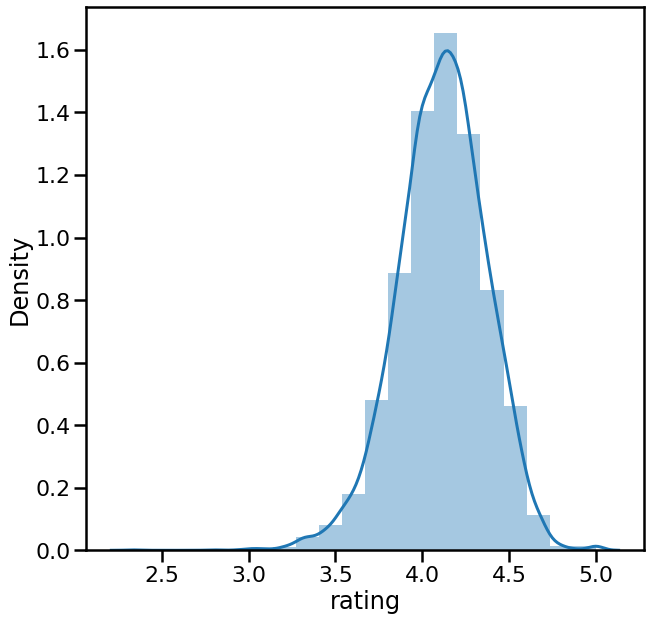

In [11]:
show_rating_distribution(df)

# Finding relationships between parametrs

In [12]:
def corr_between_number_of_pages_to_rating(df: pd):
    plt.figure(figsize=(30,40))
    sns.set_context('notebook')
    ax = sns.jointplot(x="rating", y="pages-count", data = df, color = 'blue')
    ax.set_axis_labels("rating", "pages-count")

<Figure size 2160x2880 with 0 Axes>

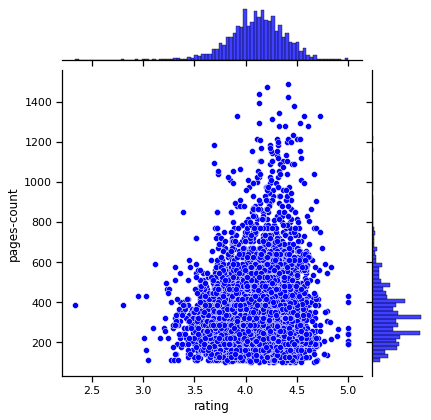

In [13]:
corr_between_number_of_pages_to_rating(df)

We can observe from the plot above, that most of the books are under 1000 number of pages

In [14]:
trial = df[~(df['pages-count']>1000)]

<Figure size 2160x2880 with 0 Axes>

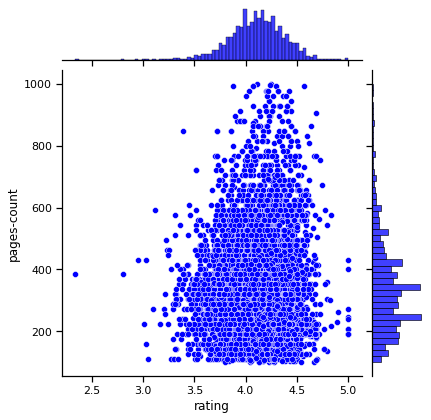

In [15]:
corr_between_number_of_pages_to_rating(trial)

from the plot above, we can see that the highest rating ever given for a book, usually are for books with 200-400 number of pages,
our assessment is that people probably likes average number of pages , and wont choose a book with too many pages

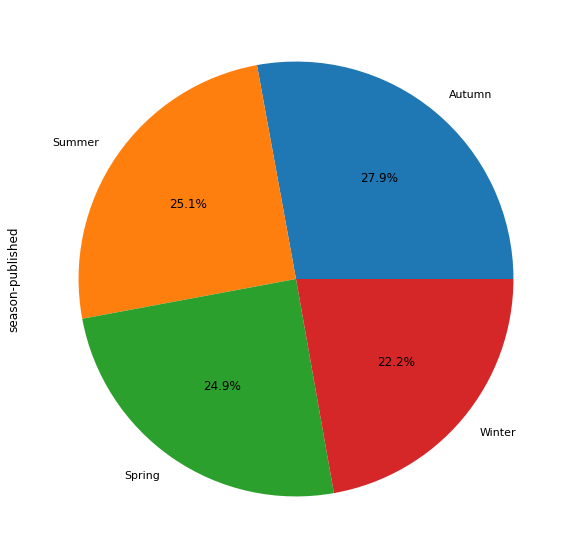

In [16]:
show_season_distribution(df)

As we can see authors like to publish the book any time of the year, without tendency for a particular season.
we might say there is a slight chance people read more during Autumn.

# Correlation between weight and price

In [17]:
df['weight'].corr(df['price-ILS'])

0.6799863855878056

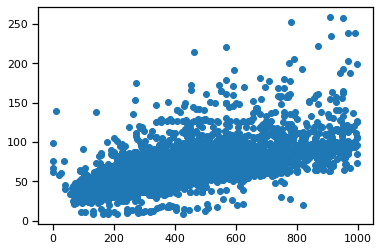

In [17]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(df['weight'],df['price-ILS'])
plt.show()

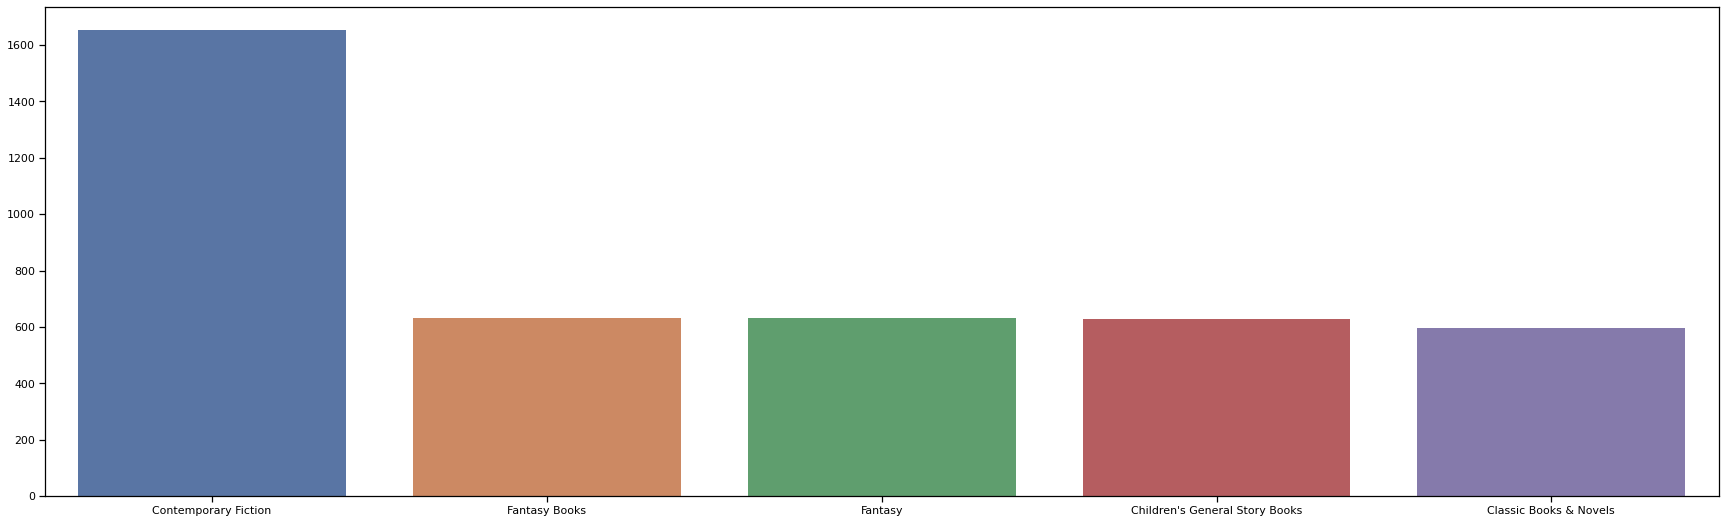

In [18]:
show_top5_categories(df)

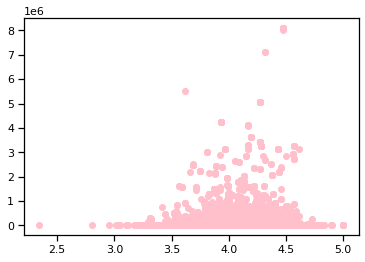

In [26]:
df['rating'].corr(df['rating-count'])
fig = plt.figure()
ax = plt.axes()
ax.scatter(df['rating'],df['rating-count'], color="pink")
plt.show()

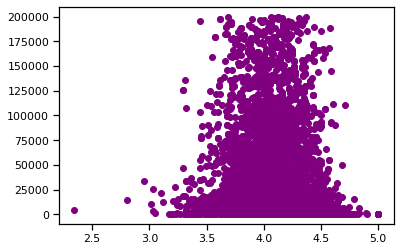

In [27]:
trial = df[~(df['rating-count'] > 2 * (10 ** 5))]
trial['rating'].corr(trial['rating-count'])
fig = plt.figure()
ax = plt.axes()
ax.scatter(trial['rating'],trial['rating-count'], color="purple")
plt.show()